Populating the interactive namespace from numpy and matplotlib


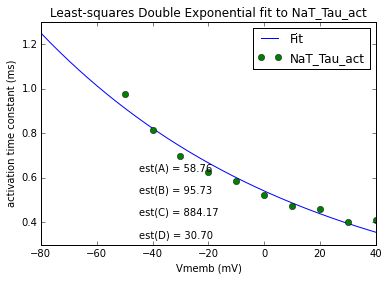

In [1]:
#Least Squares fit for iAMC_NaT channel Tau activation
#load python packages
%pylab inline
import pandas as pd
from scipy.optimize import leastsq

#load data from Excel Spread Sheet
xl = pd.ExcelFile("iAMC_kinetics.xlsx")
tvm = xl.parse("NaT_tau_act")

# set parameters for curve-fit
v = tvm.columns
y = tvm.T['mean']
ysd = tvm.T['SD']

def func(v, A, B, C, D):
    """Double Exponential equation."""
    return 1/((np.exp((v+A)/B))+(np.exp((-v-C)/D)))

def residuals(p, y, v):
    """Deviations of data from fitted DE curve"""
    A,B,C,D = p
    err = y-func(v, A, B, C,D)
    return err

def peval(v, p):
    """Evaluated value at v with current parameters."""
    A,B,C,D = p
    return func(v, A, B, C,D)

# Initial guess for parameters
# p0 = [60, 5, 8]
p0 = [-34, 10, 67,15]

# Fit equation using least squares optimization
plsq = leastsq(residuals, p0, args=(y, v))

# Plot results
vv = np.linspace(-80, 40, num=501)
plt.plot(vv,peval(vv,plsq[0]),v,y,'o')
plt.title('Least-squares Double Exponential fit to NaT_Tau_act')
plt.xlabel('Vmemb (mV)')
plt.ylabel('activation time constant (ms)')
plt.legend(['Fit', 'NaT_Tau_act'], loc='upper right')
for i, (param, est) in enumerate(zip('ABCD', plsq[0])):
    plt.text(-45, 0.63-i*0.1, 'est(%s) = %.2f' % (param, est))
#plt.savefig('iAMC_Na_Tau_act.png')

Populating the interactive namespace from numpy and matplotlib


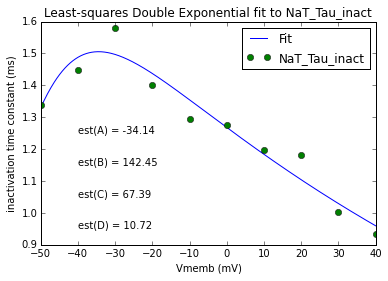

In [2]:
#Least Squares fit for iAMC_NaT channel Tau inactivation
#load python packages
%pylab inline
import pandas as pd
from scipy.optimize import leastsq

#load data from (edited) Excel Spread Sheet
xl = pd.ExcelFile("iAMC_kinetics.xlsx")
tvm = xl.parse("NaT_tau_inact")

# set parameters for curve-fit
v = tvm.columns
y = tvm.T['mean']
ysd = tvm.T['SD']

def func(v, A, B, C, D):
    """Double Exponential equation."""
    return 1/((np.exp((v+A)/B))+(np.exp((-v-C)/D)))

def residuals(p, y, v):
    """Deviations of data from fitted DE curve"""
    A,B,C,D = p
    err = y-func(v, A, B, C,D)
    return err

def peval(v, p):
    """Evaluated value at v with current parameters."""
    A,B,C,D = p
    return func(v, A, B, C,D)

# Initial guess for parameters
# p0 = [60, 5, 8]
p0 = [-34, 10, 67,15]

# Fit equation using least squares optimization
plsq = leastsq(residuals, p0, args=(y, v))

# Plot results
vv = np.linspace(-50, 40, num=501)
plt.plot(vv,peval(vv,plsq[0]),v,y,'o')
plt.title('Least-squares Double Exponential fit to NaT_Tau_inact')
plt.xlabel('Vmemb (mV)')
plt.ylabel('inactivation time constant (ms)')
plt.legend(['Fit', 'NaT_Tau_inact'], loc='upper right')
for i, (param, est) in enumerate(zip('ABCD', plsq[0])):
    plt.text(-40, 1.25-i*0.1, 'est(%s) = %.2f' % (param, est))
#plt.savefig('iAMC_Na_Tau_inact.png')

Populating the interactive namespace from numpy and matplotlib


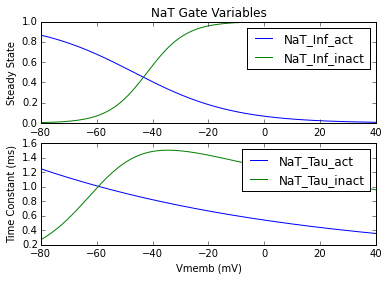

In [3]:
#Plots of iAMC_NaT Channel Time Course and Steady State for activation and inactivation
#load python packages
%pylab inline

#Inf parameters
m_scale = -17.793
m_midpoint = -46.742

h_scale = 7.0168
h_midpoint = -41.89

v = np.linspace(-80, 40, num=2000)

#Inf equations
Inf_a = 1/(1+np.exp(-(v-m_midpoint)/m_scale))
Inf_ina = 1/(1+np.exp(-(v-h_midpoint)/h_scale))

#plot Inf
subplot(2,1,1)
plt.plot(v, Inf_a, v, Inf_ina)
plt.title('NaT Gate Variables')
plt.xlabel('Vmemb (mV)')
plt.ylabel('Steady State')
plt.legend(['NaT_Inf_act', 'NaT_Inf_inact'], loc='upper right')

#Tau parameters
A_a = 58.76
B_a = 95.73
C_a = 894.17
D_a = 30.70

A_ina = -34.14
B_ina = 142.45
C_ina = 67.39
D_ina = 10.72

#Tau equations
Tau_a = 1/((np.exp((v+A_a)/B_a))+(np.exp((-v-C_a)/D_a)))
Tau_ina = 1/((np.exp((v+A_ina)/B_ina))+(np.exp((-v-C_ina)/D_ina)))

#plot Tau
subplot(2,1,2)
plt.plot(v, Tau_a, v, Tau_ina)
plt.xlabel('Vmemb (mV)')
plt.ylabel('Time Constant (ms)')
plt.legend(['NaT_Tau_act', 'NaT_Tau_inact'], loc='upper right')